#  **Geração de Boxplots  (sLLMs)**

**Authors:** Renato Freitas Bessa, Adonias Caetano de Oliveira, Ariel Soares Teles

**Institution:** UFDPar - PPGBiotec

**Objective:** Gera os boxplots dos sLLMs (llama e qwen)

In [ ]:
install.packages("googledrive")
install.packages("readxl")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Carregar os pacotes
library(googledrive)
library(readxl)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Autenticar no Google Drive (necessário apenas na primeira execução)
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9841f495f56479c0672e45b40280d9ab&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWJfNXFsa2Z4NlREakgtQmtmR2JQYmNYN21YY01CazRnTnk0aUJ2STduQ1NIc2hkaDQxUUltem4zby1WX3FEUlFQWi1FUSIsInN0YXRlIjoiOTg0MWY0OTVmNTY0NzljMDY3MmU0NWI0MDI4MGQ5YWIifQ==


In [ ]:
# URL pública da planilha
url <- "public link to access the Fallbacks-LLMs spreadsheet"

# Extrair o ID do arquivo
file_id <- unlist(strsplit(url, "/"))[6]

# Construir a URL de leitura
read_url <- paste0("https://drive.google.com/uc?id=", file_id)

# Exibir a URL gerada
print(read_url)

[1] "https://drive.google.com/uc?id=1EhsWpJWhz56jIxQ-wCoS4RUYQ_9RprCt"


In [ ]:
# Baixar o arquivo temporariamente
arquivo_temp <- tempfile(fileext = ".xlsx")
drive_download(as_id(file_id), path = arquivo_temp, overwrite = TRUE)

File downloaded:

• respostas_modelos.xlsx <id: 1EhsWpJWhz56jIxQ-wCoS4RUYQ_9RprCt>

Saved locally as:

• /tmp/RtmpoFyUxW/file3376d02a953.xlsx



In [ ]:
# Ler a aba específica do arquivo Excel
nome_aba <- "Accuracy" # Substitua pelo nome da aba que deseja ler
dados <- read_excel(arquivo_temp, sheet = nome_aba)

# Visualizar os primeiros registros
head(dados)

Revalida Edition,Model,Accuracy Rate
<chr>,<chr>,<dbl>
2017 - Blue,Qwen2.5-7B,0.00
2017 - Red,Qwen2.5-7B,0.00
2020.01,Qwen2.5-7B,0.01
2020.02,Qwen2.5-7B,0.00
2021.01,Qwen2.5-7B,0.01
2022.01,Qwen2.5-7B,0.01


In [ ]:
qwen25 = dados$`Accuracy Rate`[0:9]
qwen25

[1] 0.00 0.00 0.01 0.00 0.01 0.01 0.00 0.00 0.00

In [ ]:
llama31 = dados$`Accuracy Rate`[10:18]
llama31

[1] 0.16 0.16 0.22 0.15 0.22 0.18 0.21 0.20 0.17

In [ ]:
llama31Reasoning = dados$`Accuracy Rate`[19:27]
llama31Reasoning

[1] 0.06 0.07 0.04 0.04 0.07 0.05 0.04 0.04 0.03

In [ ]:
qwen25Reasoning = dados$`Accuracy Rate`[28:36]
qwen25Reasoning

[1] 0.09 0.09 0.08 0.08 0.15 0.11 0.07 0.15 0.11

In [ ]:
xtick<-seq(45, 85, by=5)

In [ ]:
get_labels <- function(valores) {

  lista <- c() # Inicializa uma lista vazia
  for (numero in valores) {
    str_valor <- toString( numero )
    lista <- c(lista, gsub("\\.", ",", str_valor))
  }
  return (lista)
}

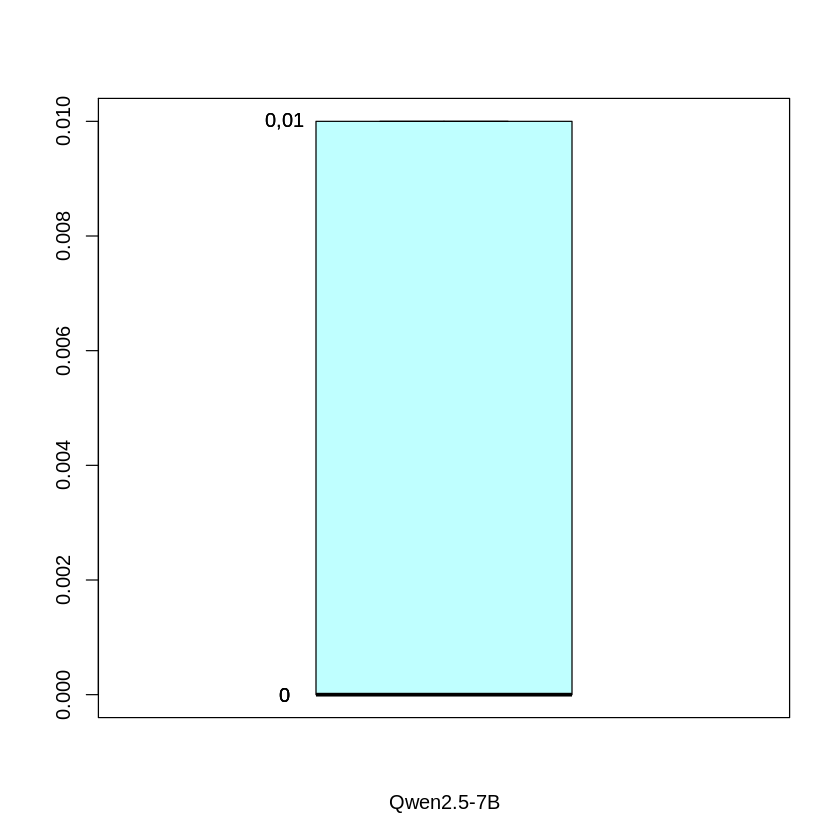

In [ ]:
# Criando o boxplot
boxplot(qwen25, xlab = "Qwen2.5-7B", col = rgb(0, 1, 1, alpha = 0.25), border = "black")
axis(2, at = xtick, labels = xtick)
text(y = fivenum(qwen25), labels = get_labels( fivenum(qwen25) ), x=0.75)

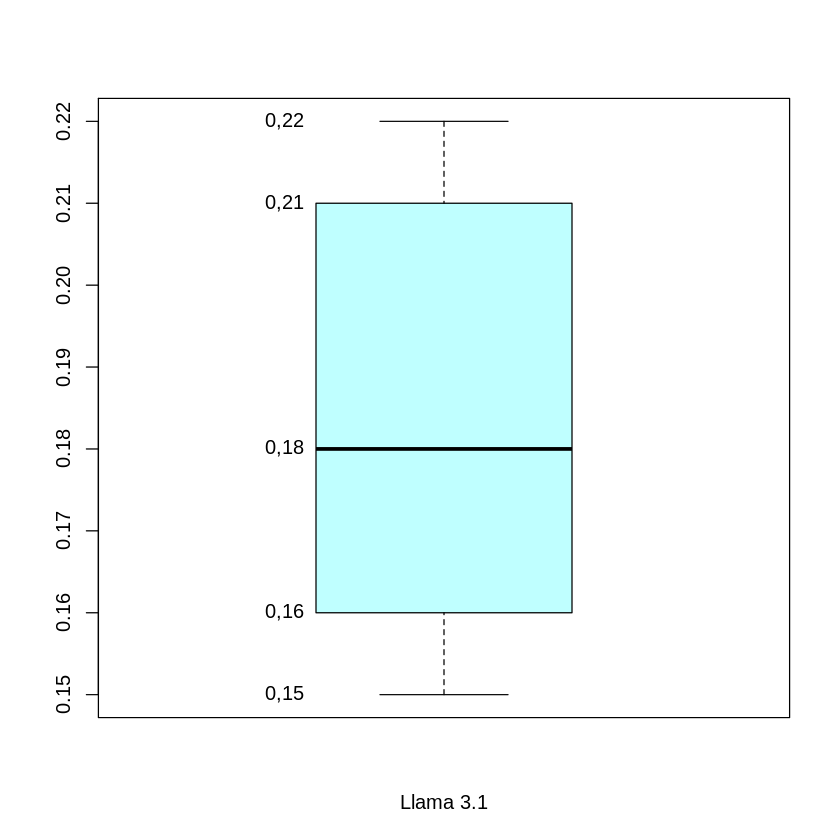

In [ ]:
# Criando o boxplot
boxplot(llama31, xlab = "Llama 3.1", col = rgb(0, 1, 1, alpha = 0.25), border = "black")
axis(2, at = xtick, labels = xtick)
text(y = fivenum(llama31), labels = get_labels( fivenum(llama31) ), x=0.75)

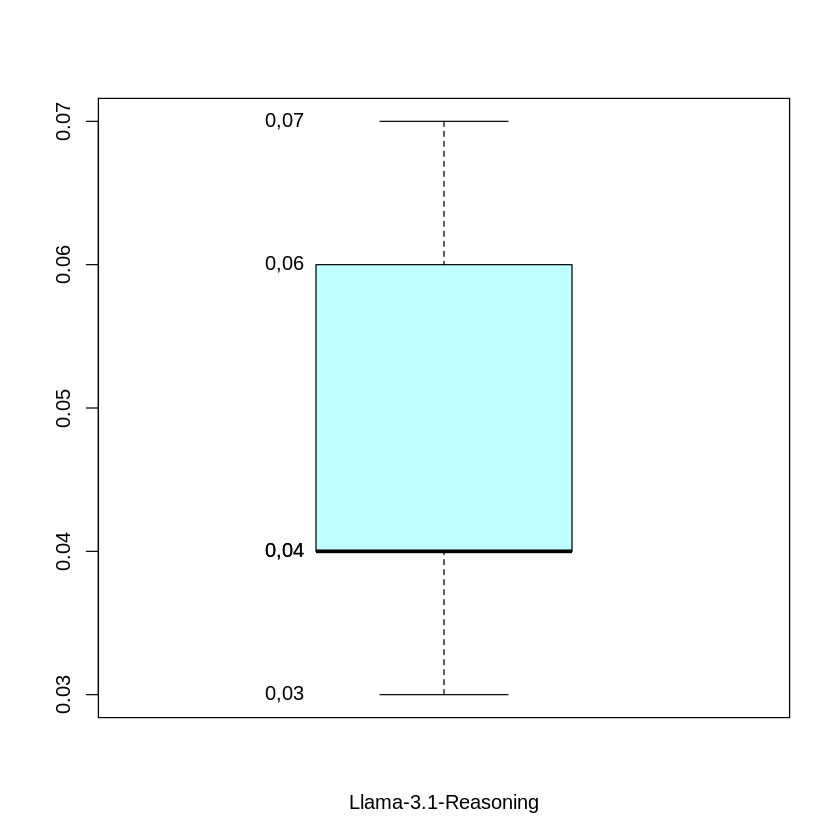

In [ ]:
# Criando o boxplot
boxplot(llama31Reasoning, xlab = "Llama-3.1-Reasoning",  col = rgb(0, 1, 1, alpha = 0.25), border = "black")
axis(2, at = xtick)
text(y = fivenum(llama31Reasoning), labels = get_labels( fivenum(llama31Reasoning) ), x=0.75)

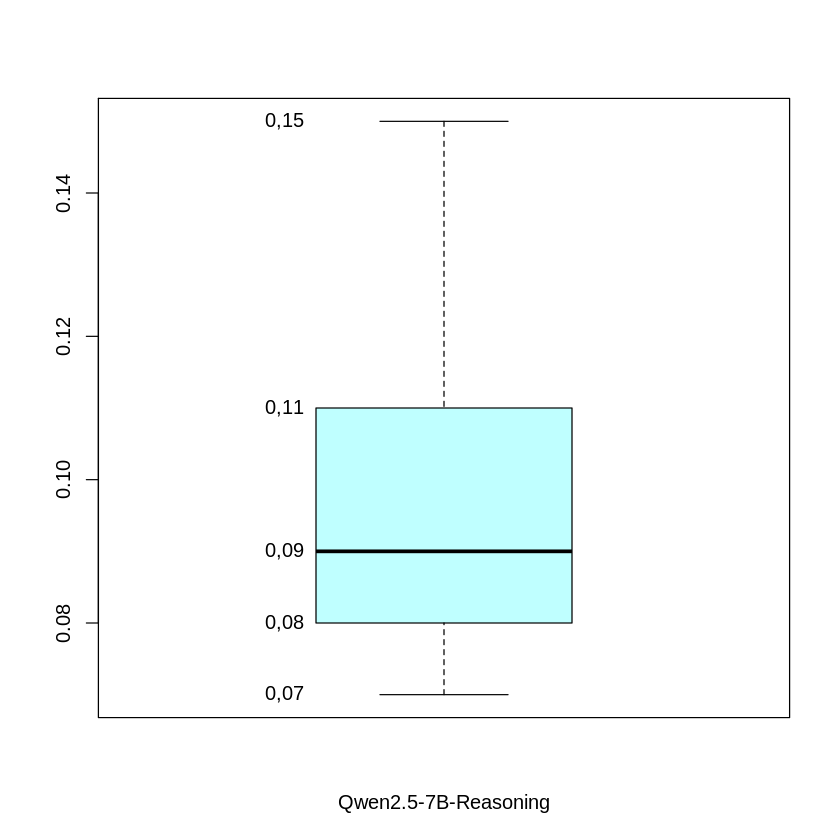

In [ ]:
# Criando o boxplot
boxplot(qwen25Reasoning, xlab = "Qwen2.5-7B-Reasoning",  col = rgb(0, 1, 1, alpha = 0.25), border = "black")
axis(2, at = xtick)
text(y = fivenum(qwen25Reasoning), labels = get_labels( fivenum(qwen25Reasoning) ), x=0.75)